# Mean Shift from Scratch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
  
style.use("ggplot")

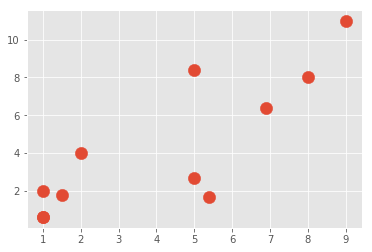

In [2]:
X = np.array([[1, 2],
            [1.5, 1.8],
            [5, 2.7],
            [8, 8],
            [1, 0.6],
            [9, 11],
            [1, 0.6],
            [5.4, 1.7],
            [5, 8.4],
            [6.9, 6.4],
            [2, 4]])
plt.scatter(X[:,0], X[:,1], s = 150)
plt.show()
colors = 10 * ["g", "r", "b", "y", "c", "k"]

In [3]:
class MeanShift:
    def __init__(self, radius=4):
        self.radius = radius
    
    def fit(self, data):
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwdith = []  # All centroids in the radius
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset - centroid) < self.radius:
                        in_bandwdith.append(featureset)
                new_centroid = np.average(in_bandwdith, axis=0)  # Mean vector      
                new_centroids.append(tuple(new_centroid))
            # In the process, some of the centroids will be an identical copies of other centroids.
            # Next lines fix that problem.
            uniques = sorted(list(set(new_centroids)))  # Unique elements from the new centroids list
            